In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)

import support_modeling as sp  

In [2]:
df=pd.read_pickle("../results/df_encoded_balanced.pkl")
df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel,Department,EducationField,JobLevel,MaritalStatus,StockOptionLevel,TrainingTimesLastYear,...,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
0,3.0,4.0,2.0,2.0,0.151844,0.163752,1.0,0.120690,0.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,2.0,4.0,3.0,0.154691,0.163752,1.0,0.260331,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.0,2.0,1.0,3.0,0.154691,0.111157,4.0,0.120690,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,4.0,3.0,1.0,0.154691,0.163752,3.0,0.120690,3.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1.0,3.0,2.0,0.154691,0.166667,1.0,0.260331,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
variable_dependiente="Attrition"
modelo = sp.AnalisisModelosClasificacion(df, variable_dependiente)

In [4]:
modelo_elegido="logistic_regression"

In [5]:
logistic_regression_model=modelo.ajustar_modelo(modelo_elegido)

C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
225 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

In [6]:
modelo.calcular_metricas(modelo_elegido)

,train,test
accuracy,0.742077,0.725146
precision,0.742715,0.726273
recall,0.742077,0.725146
f1,0.742038,0.725376
kappa,0.484378,0.449709
auc,0.817238,0.798923


1. Accuracy (77.74% train, 72.47% test):
El modelo tiene un desempeño aceptable, pero la caída en el conjunto de prueba indica un posible overfitting. Podría beneficiarse de ajustes para mejorar su capacidad de generalización.

2. Precision (77.83% train, 72.78% test):
Buena precisión, especialmente en el conjunto de entrenamiento. Sin embargo, la ligera disminución en el test sugiere que podría estar clasificando algunos falsos positivos en el conjunto de prueba.

3. Recall (77.74% train, 72.47% test):
La sensibilidad es consistente con la accuracy, mostrando que el modelo está capturando una buena proporción de positivos, pero hay margen de mejora en el conjunto de prueba.

4. F1-Score (77.71% train, 72.44% test):
El equilibrio entre precisión y sensibilidad está alineado con las demás métricas, reflejando el impacto de los falsos positivos y negativos. El descenso en el test reafirma el posible overfitting.

5. Kappa (0.55 train, 0.45 test):
Este valor indica un desempeño moderado, con un acuerdo razonable entre predicciones y valores reales. El descenso en el conjunto de prueba refuerza la idea de ajustar hiperparámetros.

6. AUC (84.39% train, 79.47% test):
El modelo tiene una capacidad sólida para diferenciar entre clases, pero el descenso en el test también sugiere que podría mejorarse la generalización.

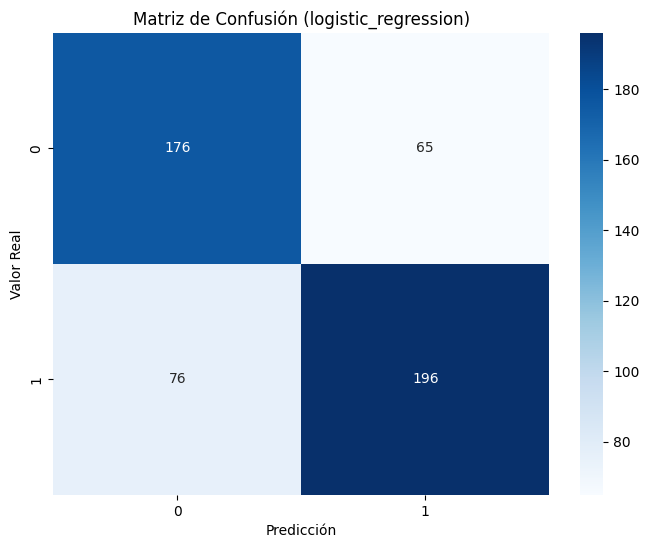

In [7]:
modelo.plot_matriz_confusion(modelo_elegido)

Parece que el modelo tiene un buen balance entre las clases, aunque hay margen de mejora en los falsos positivos y falsos negativos. Para una interpretación más detallada, necesitamos calcular métricas como precisión, sensibilidad, especificidad y F1-score, dependiendo de la importancia relativa de los errores FP y FN.

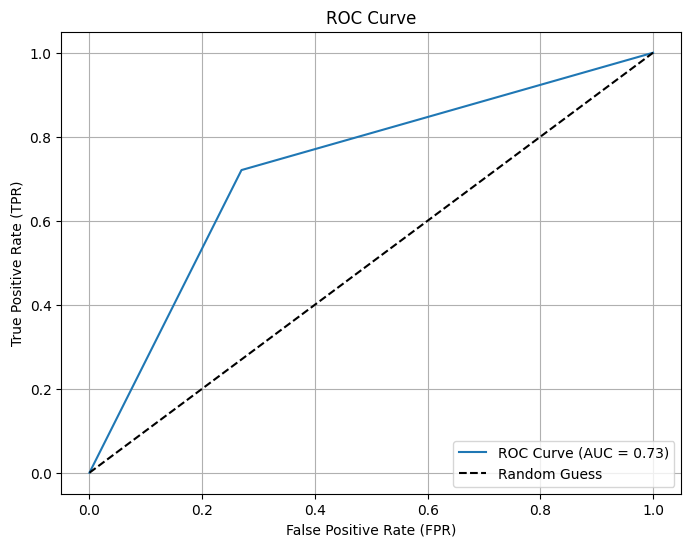

In [8]:
modelo.hacer_roc_curve(modelo_elegido)

El modelo tiene un desempeño razonable con un AUC de 0.73, lo que indica que diferencia bien entre clases, aunque no de forma óptima. Supera al azar, pero hay margen de mejora.

c:\Users\alexc\Desktop\GIT\Proyecto8-Employee_Predictor\notebooks\../src\support_modeling.py:214: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


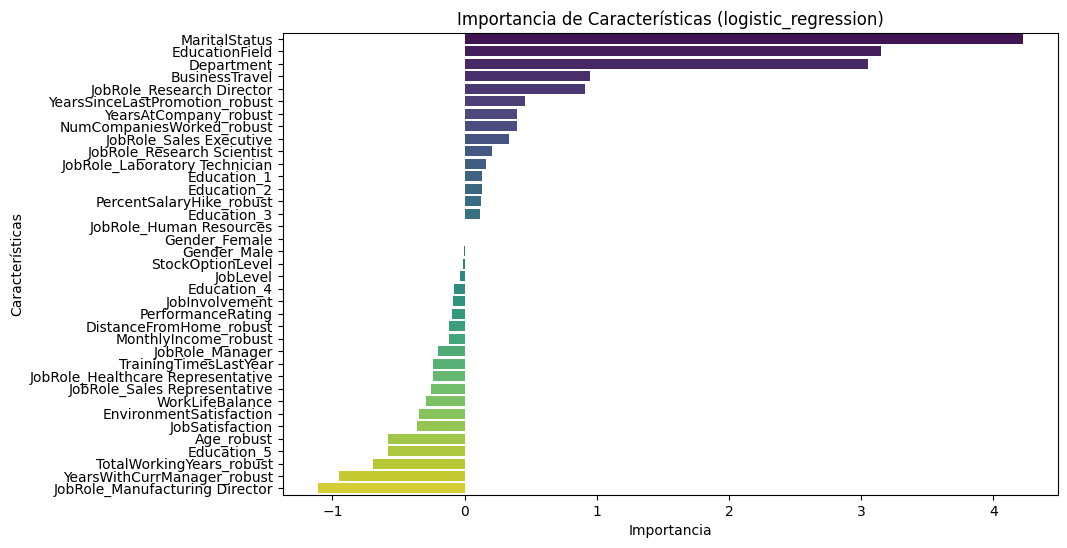

In [9]:
modelo.importancia_predictores(modelo_elegido)

Las variables más influyentes son Department, MaritalStatus y EducationalField, mientras que algunas, como YearsWithCurrManager_robust, tienen poca relevancia. Podríamos eliminar o transformar variables menos importantes para optimizar el modelo.

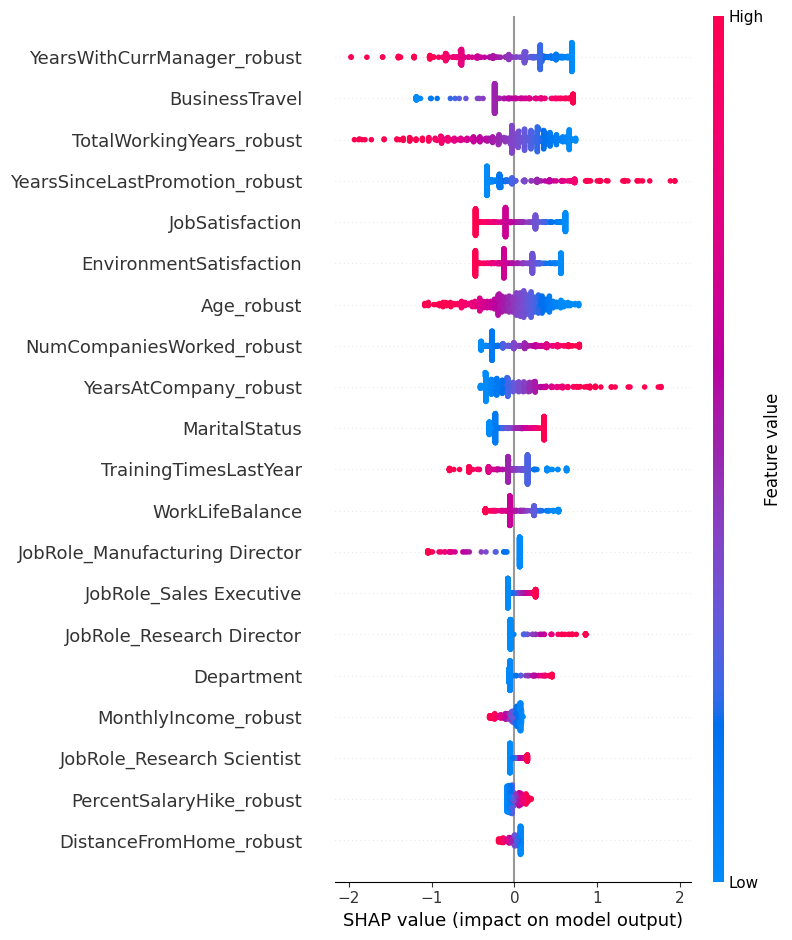

In [10]:
modelo.plot_shap_summary(modelo_elegido)

Las variables YearsWithCurrManager_robust, TotalWorkingYears_robust y YearsSinceLastPromotion_robust son las más influyentes en las predicciones, con impactos diferenciados según sus valores altos o bajos.